In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

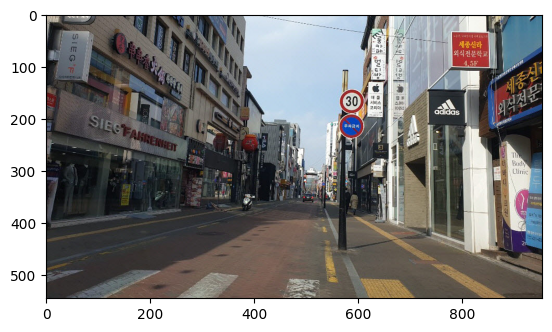

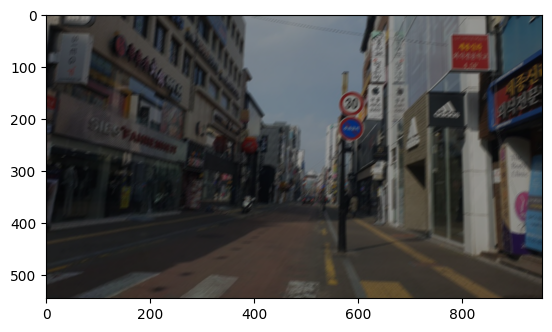

In [2]:
# 이미지 파일 불러오기
image = cv2.imread('./data/image02.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 모션 블러 커널 생성
kernel_size = 15
kernel_direction = np.zeros((kernel_size, kernel_size))
kernel_direction[int(kernel_size//2), :] = np.ones(kernel_size)
kernel_direction /= kernel_size # 커널의 합1이 1이 되도록
kernel_matrix = cv2.getRotationMatrix2D((kernel_size/2, kernel_size/2), 45, 1)
kernel = np.hstack((kernel_matrix[:, :2], [[0], [0]])) # 회전 매트릭스와 오프셋 벡터 결합하여 2x3 매트릭스 생성
kernel = cv2.warpAffine(kernel_direction, kernel, (kernel_size, kernel_size))

# 모션 블러 처리
motion_blur = cv2.filter2D(image, -1, kernel)

# 원본 이미지 
plt.imshow(image)
plt.show()

# 모션 블러 처리
plt.imshow(motion_blur)
plt.show()